# Exercise 1 - Linear Regression

The first exercise is about linear models.
The given data set contains prices and other attributes of approximately 54,000 diamonds. You should fit a linear model to predict the price of a diamond, given its attributes.

This exercise is meant to get you started with the tool stack. Besides numpy and matplotlib we use the following python packages:

- [pandas](https://pandas.pydata.org/)
- [sklearn](http://scikit-learn.org/)

If you are unfamiliar with them, follow the documentation links. 

In the event of a persistent problem, do not hesitate to contact the course instructor under

- paul.kahlmeyer@uni-jena.de

### Submission
- Deadline of submission:
        19.04.23 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=43681)


### Help
In case you cannot solve a task, you can use the saved values within the `help` directory:
- Load arrays with [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.load.html)
```
np.load('help/array_name.npy')
```
- Load functions with [Dill](https://dill.readthedocs.io/en/latest/dill.html)
```
import dill
with open('help/some_func.pkl', 'rb') as f:
    func = dill.load(f)
```

to continue working on the other tasks.

## Preprocessing

We use the same notation as in the lecture.
- $m$... Number of datapoints
- $n$... Number of features

### Dataset 

As a dataset, we use the [diamond dataset](https://www.kaggle.com/shivam2503/diamonds).

Each element in this dataset represents a diamond and has the following features:

- price: price in US dollars (326.0 - 18823.0)
- carat: weight of the diamond (0.2 - 5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0-10.74)
- y: width in mm (0-58.9)
- z: depth in mm (0-31.8)
- depth: total depth percentage = 2 * z / (x + y) (43-79)
- table: width of top of diamond relative to widest point (43-95)

The dataset is stored under `diamonds.csv`.

### Task 1
Import the data from the file using [pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and examine it.

Determine the following:

* The number of data points
* The column names
* The data types for each column

In [1]:
# TODO: load data
import pandas as pd
df = pd.read_csv("diamonds.csv")

# TODO: determine number of datapoints
print("dataset size", df.size)
print(df.info)

# TODO: determine column names
col_names = df.columns
print(col_names)

# TODO: determine datatypes of columns
dtypes = df.dtypes
print(dtypes)

df

dataset size 539400
<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 column

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Task 2

Since there are discrete variables and we do not yet know how to include them into our regression model, remove them. Additionally, verify that there are no missing values in our dataset.

Hint: there are multiple ways to [check](https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345) for missing values

In [2]:
import numpy as np

# TODO: remove discrete variables
if "cut" in df.columns:
    df = df.drop(["cut", "color", "clarity"], axis=1)

# check for missing values
assert not np.isnan(df.values).any(), "There are missing values!"

As discussed in the lecture, we should **standardize** the data, to make different scales comparable.

Standardization is defined for each feature $x_i$:

\begin{align}
\hat{x}_i = \cfrac{x_i-\mu_x}{\sigma_x}\,,
\end{align}
where $\mu_x$ and $\sigma_x$ are the empirical [mean](https://en.wikipedia.org/wiki/Mean) and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of the feature $x$.

### Task 3

Convert the pandas dataframe to a numpy array and calculate the standardized data matrix $X$.

In [3]:
def pm(title: str, a: np.ndarray) -> None:
    print(f"\n{title} {a.shape}")
    print(a)

In [4]:
# TODO: calculate standardized data matrix X
X_unfitted = np.array(df)

num_rows = X_unfitted.shape[0]

# empirical mean / Erwartungswert
Means = np.einsum('ij->j', X_unfitted) / num_rows
Means_using_np = np.mean(X_unfitted, axis=0)

pm("empirical mean μ", Means)
pm("numpy mean", Means_using_np)
pm("Deviation between numpy and our mean", Means - Means_using_np)

pm("features X_original", X_unfitted)

Standard_deviation = np.std(X_unfitted, axis=0)
pm("standard deviation σ", Standard_deviation)

X_fitted = (X_unfitted - Means) / Standard_deviation
pm("transformed features X", X_fitted)

_cols = df.columns
X_fitted_df = pd.DataFrame(X_fitted, columns=_cols)


empirical mean μ (7,)
[7.97939748e-01 6.17494049e+01 5.74571839e+01 3.93279972e+03
 5.73115721e+00 5.73452595e+00 3.53873378e+00]

numpy mean (7,)
[7.97939748e-01 6.17494049e+01 5.74571839e+01 3.93279972e+03
 5.73115721e+00 5.73452595e+00 3.53873378e+00]

Deviation between numpy and our mean (7,)
[ 3.10862447e-15  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.44089210e-15 -7.10542736e-15  8.88178420e-16]

features X_original (53940, 7)
[[ 0.23 61.5  55.   ...  3.95  3.98  2.43]
 [ 0.21 59.8  61.   ...  3.89  3.84  2.31]
 [ 0.23 56.9  65.   ...  4.05  4.07  2.31]
 ...
 [ 0.7  62.8  60.   ...  5.66  5.68  3.56]
 [ 0.86 61.   58.   ...  6.15  6.12  3.74]
 [ 0.75 62.2  55.   ...  5.83  5.87  3.64]]

standard deviation σ (7,)
[4.74006851e-01 1.43260804e+00 2.23446985e+00 3.98940276e+03
 1.12175035e+00 1.14212409e+00 7.05692305e-01]

transformed features X (53940, 7)
[[-1.19816781 -0.17409151 -1.09967199 ... -1.58783745 -1.53619556
  -1.57112919]
 [-1.24036129 -1.36073849  1.58552871 .

In [5]:
# test equivalence of operations
for i in np.arange(X_fitted.shape[0]):
    for j in np.arange(X_fitted.shape[1]):
        assert X_fitted[i,j] == (X_unfitted[i,j] - Means[j]) / Standard_deviation[j]

### Task 4

Scikit learn has an [implementation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) of this preprocessing.

Use it to create a second standardized data matrix and compare this result with your result from Task 3.

In [6]:
# TODO: compare to sklearn result
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
diamond_scaler = scaler.fit(X_unfitted)


pm("Mean old", Means)
pm("Mean Skl", diamond_scaler.mean_)
pm("Mean dif", Means - diamond_scaler.mean_)

pm("Std old", Standard_deviation)
pm("Std Skl", diamond_scaler.var_)
pm("Std dif", Standard_deviation - diamond_scaler.var_)

X_fit_sklearn = diamond_scaler.transform(X_unfitted)

pm("sklearn scaler", X_fit_sklearn)
pm("old scale", X_fitted)

Deviation = X_fitted - X_fit_sklearn
pm("Deviation between scalers", Deviation)

print((X_fitted == X_fit_sklearn).any())


Mean old (7,)
[7.97939748e-01 6.17494049e+01 5.74571839e+01 3.93279972e+03
 5.73115721e+00 5.73452595e+00 3.53873378e+00]

Mean Skl (7,)
[7.97939748e-01 6.17494049e+01 5.74571839e+01 3.93279972e+03
 5.73115721e+00 5.73452595e+00 3.53873378e+00]

Mean dif (7,)
[ 3.10862447e-15  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.44089210e-15 -7.10542736e-15  8.88178420e-16]

Std old (7,)
[4.74006851e-01 1.43260804e+00 2.23446985e+00 3.98940276e+03
 1.12175035e+00 1.14212409e+00 7.05692305e-01]

Std Skl (7,)
[2.24682494e-01 2.05236579e+00 4.99285551e+00 1.59153344e+07
 1.25832384e+00 1.30444743e+00 4.98001630e-01]

Std dif (7,)
[ 2.49324356e-01 -6.19757754e-01 -2.75838566e+00 -1.59113450e+07
 -1.36573496e-01 -1.62323343e-01  2.07690675e-01]

sklearn scaler (53940, 7)
[[-1.19816781 -0.17409151 -1.09967199 ... -1.58783745 -1.53619556
  -1.57112919]
 [-1.24036129 -1.36073849  1.58552871 ... -1.64132529 -1.65877419
  -1.74117497]
 [-1.19816781 -3.38501862  3.37566251 ... -1.49869105 -1.45739

## Inspecting the Data

Visualizing correlation in your data often helps to build intuition and get a feeling of the deeper mojo in the set.

Here we want to use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) as a measure for correlation between two variables.

Let $x$ and $y$ be two variables of the unstandardized dataset (e.g. `carat` and `price`). The empirical Pearson correlation coefficient between $x$ and $y$ is defined as 

\begin{align}
r_{xy} = \cfrac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}\,,
\end{align}
where $\bar{x}$ and $\bar{y}$ are the respective empirical means.

### Task 5

How does this definition translate to our standardized data matrix $X$?

Calculate the pairwise correlation matrix for our dataset. 

Visualize this correlation matrix and label the rows/columns.


Correlation matrix (7, 7)
          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

Correlation pandas (7, 7)
          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.12713

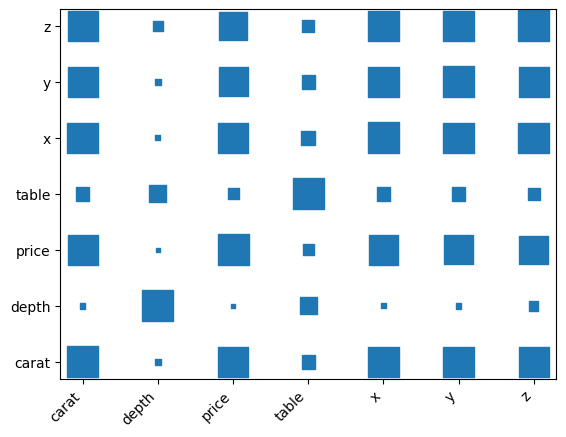

In [7]:
# The Pearson correlation coefficient is not sensitive to unstandardised data.
# It contains the standard deviation in the denominator for each variables

# TODO: calculate correlation matrix
def pcc(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    covariance = np.sum( (x - mean_x) * (y - mean_y ) )
    denominator = np.sqrt( np.sum( (x - mean_x)**2 ) ) * np.sqrt( ( np.sum( (y - mean_y)**2 ) ) )

    return covariance / denominator

shape1 = X_fitted.shape[1]
correllation_matrix = np.zeros((shape1, shape1))

for i in range(shape1):
    for j in range(shape1):
        correllation_matrix[i][j] = pcc(X_fitted.transpose()[i], X_fitted.transpose()[j])

_cols = df.columns

correllation_matrix = pd.DataFrame(correllation_matrix, _cols, _cols)
pm("Correlation matrix", correllation_matrix)

pm("Correlation pandas", df.corr())

# TODO: visualize correlation matrix
# Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

import matplotlib.pyplot as plt
def heatmap(x, y, size):
    fig, ax = plt.subplots()

    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)}
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}

    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )

    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

corr = pd.melt(correllation_matrix.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get a pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

## Linear Regression

Our goal in this exercise will be to predict the `price` of a diamond based on some of its other features.

We will use linear regression, that is we assume the `price` (=$y$) depends linearly on the other features (=$\mathbf{x}$):
\begin{align}
y = \theta^T \mathbf{x} + \varepsilon
\end{align}
where $\varepsilon$ is standard normal distributed noise.

In `Linear_Regression_Script.pdf` you find how the maximum likelihood estimate $\hat\theta$ is calculated.

### Task 6

Implement a `LinReg` class that uses maximum likelihood estimation. Add the possibility to use [Ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression).

In [8]:
class LinReg():
    
    def __init__(self, c:int = 0):
        '''
        Class for linear regression.
        
        @Params:
            c... parameter for ridge regression
        '''
        # TODO: create attributes: c, theta
        self.c = c
        self.theta = 0

    def fit(self, X:np.ndarray, Y:np.ndarray) -> None:
        '''
        Learns the parameters for a linear regression task.
        
        @Params:
            X... n x m matrix
            Y... vector of length m
        '''
        
        # TODO: estimate theta
        # self.theta = ( np.linalg.inv( X @ X.transpose() ) ) @ X.dot(Y)
        self.theta = np.linalg.solve( X @ X.transpose() + ( self.c * np.identity(X.shape[0]) ), X @ Y)

    def predict(self, X:np.ndarray) -> np.ndarray:
        '''
        Using learned parameters, predicts output for given X.
        
        @Params:
            X... n x m matrix wtf bro?
            Y... vector of length m Weeesschne!
        '''
        # TODO: predict labels

        return self.theta @ X

### Task 7

First we want to predict the `price` of a diamond solely from the variable `carat`. 
Make a scatter plot of `carat` vs `price` using matplotlib. Label the axes and give the plot a title.

Use the standardized dataset.

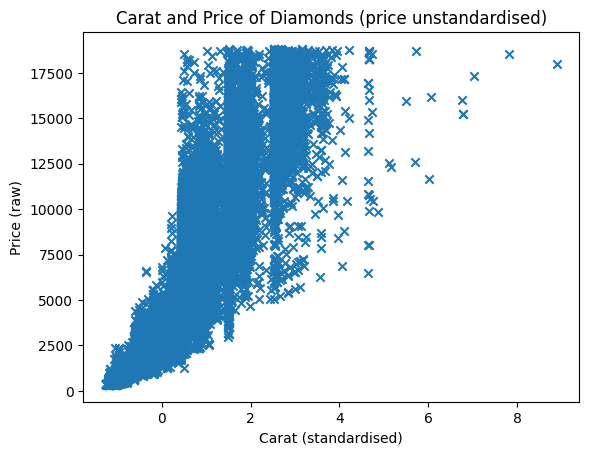

In [9]:
# TODO: display data in scatter plot

plt.title("Carat and Price of Diamonds (price unstandardised)")
plt.xlabel("Carat (standardised)")
plt.ylabel("Price (raw)")

plt.scatter(X_fitted_df['carat'], df['price'], marker="x")
plt.show()

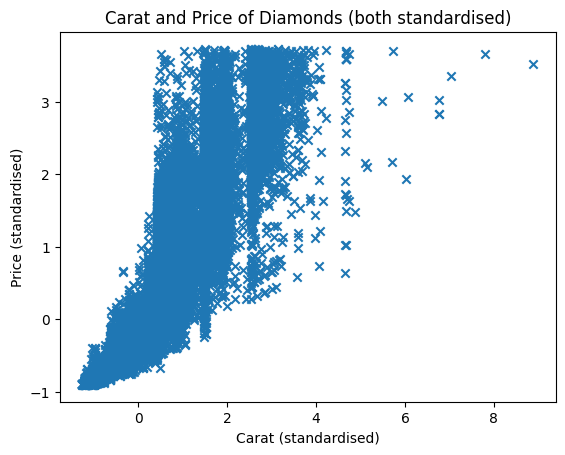

In [10]:
plt.title("Carat and Price of Diamonds (both standardised)")
plt.xlabel("Carat (standardised)")
plt.ylabel("Price (standardised)")

plt.scatter(X_fitted_df['carat'], X_fitted_df['price'], marker="x")
plt.show()

### Task 8

Set up the design matrix and use your class to estimate $\theta$ on the dataset.
Note, that the design matrix does **not** need the vector of ones, since we standardized the dataset.

Plot the regression line defined by $\theta$.

[[-1.19816781 -1.24036129 -1.19816781 ... -0.20662095  0.13092691
  -0.10113725]]
0.2764722648062299


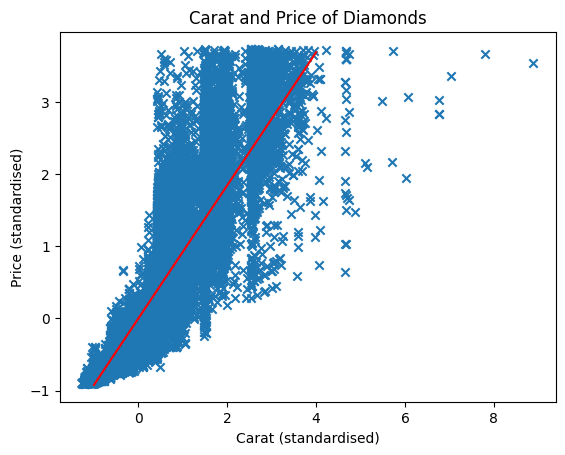

In [11]:
# TODO: build design matrix, y

X_design_matrix = np.array(X_fitted_df['carat']).reshape(1, -1)
print(X_design_matrix)

y = np.array(X_fitted_df['price'])

# TODO: use Linear Regression
lr = LinReg(1)
lr.fit(X_design_matrix, y)

print(lr.predict([0.3]))

_rg = np.arange(-1, 4.1, 0.2)
predictions = [lr.predict([c]) for c in _rg]

# TODO: plot data + regression line
plt.title("Carat and Price of Diamonds")
plt.xlabel("Carat (standardised)")
plt.ylabel("Price (standardised)")

# This does not make sense!
# We use unstandardised values as input for the predictor
plt.scatter(X_fitted_df['carat'], X_fitted_df['price'], marker="x")
plt.plot(_rg, predictions, 'r')
plt.show()

### Task 9

You can find an implementation of this method in the python module [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Use it and compare your result for the estimation of $\theta$.

**Important:** scikit learn needs the design matrix as a $m \times n$ matrix (datapoints as rows).

example [2.7647739]


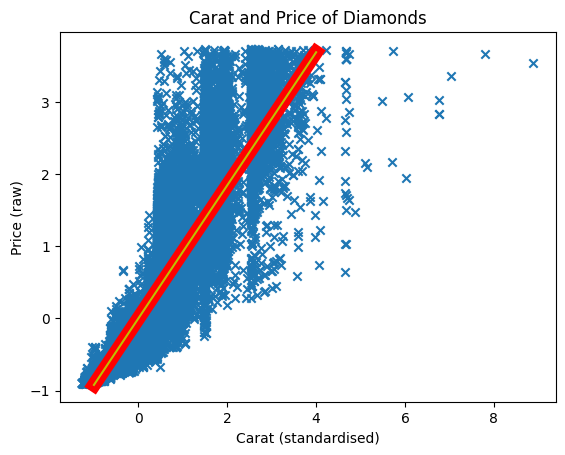

In [12]:
# TODO: use scikit learn to estimate theta
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_design_matrix.reshape(-1, 1), y)

print("example", reg.predict(np.array([[3]])))

# TODO: compare results
predictions2 = [reg.predict([[c]]) for c in _rg]

# TODO: plot data + regression line
plt.title("Carat and Price of Diamonds")
plt.xlabel("Carat (standardised)")
plt.ylabel("Price (raw)")

# This does not make sense!
# We use unstandardised values as input for the predictor
plt.scatter(X_fitted_df['carat'], X_fitted_df['price'], marker="x")
plt.plot(_rg, predictions2, 'r', linewidth=10)
plt.plot(_rg, predictions, 'y')
plt.show()

# looks sufficient to me!

### Task 10

Now predict the `price` from the variables `carat`, `depth`, `table`, `x`, `y`, `z`.

- Estimate $\theta$ with your class
- Estimate $\theta$ with scikit learn
- Compare both estimations

In [26]:
# TODO: build X, Y
from sklearn.linear_model import LinearRegression

# carat, depth, table, x, y, z
X_design_matrix_new = X_fitted_df.drop('price', axis=1).to_numpy()

# TODO: estimate theta
reg_ours_new = LinReg(1)
reg_ours_new.fit(X_design_matrix_new.transpose(), y)
%time predictions4 = np.array([reg_ours_new.predict(_x) for _x in X_design_matrix_new])

# TODO: estimate theta using scikit-learn + compare
reg_new = LinearRegression().fit(X_design_matrix_new, y)
%time predictions3 = np.array([reg_new.predict([_x]) for _x in X_design_matrix_new]).flatten()

print(predictions4)
print(predictions3)

pm("Deviation of predictions", predictions4 - predictions3)

# this is good enough


CPU times: user 179 ms, sys: 90.4 ms, total: 269 ms
Wall time: 150 ms
CPU times: user 4.23 s, sys: 222 ms, total: 4.45 s
Wall time: 4.17 s
[-0.89910285 -1.0040121  -0.95444556 ... -0.35824223  0.06098073
 -0.11742685]
[-0.89885384 -1.0037263  -0.95413556 ... -0.35836423  0.0608402
 -0.11755026]

Deviation of predictions (53940,)
[-0.00024901 -0.00028579 -0.00031    ...  0.000122    0.00014053
  0.00012341]
